In [144]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.precision', 2)
%config InlineBackend.figure_format = 'retina'

In [145]:
df = pd.read_csv('aqidataset.csv')
df.head()

,Unnamed: 0,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),Ozone,PM25,CO,PM10,NO2,AQI category,city,state
0,0,01/01/2023,28,Ozone,Connecticut Hill,36-109-9991,AQS,28,.,NaN,NaN,NaN,Good,Ithaca,NY
1,1,01/02/2023,26,Ozone,Connecticut Hill,36-109-9991,AQS,26,.,NaN,NaN,NaN,Good,Ithaca,NY
2,2,01/03/2023,21,Ozone,Connecticut Hill,36-109-9991,AQS,21,.,NaN,NaN,NaN,Good,Ithaca,NY
3,3,01/04/2023,25,Ozone,Connecticut Hill,36-109-9991,AQS,25,.,NaN,NaN,NaN,Good,Ithaca,NY
4,4,01/05/2023,31,Ozone,Connecticut Hill,36-109-9991,AQS,31,.,NaN,NaN,NaN,Good,Ithaca,NY


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10924 entries, 0 to 10923
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  10924 non-null  int64 
 1   Date                        10924 non-null  object
 2   Overall AQI Value           10924 non-null  int64 
 3   Main Pollutant              10924 non-null  object
 4   Site Name (of Overall AQI)  10790 non-null  object
 5   Site ID (of Overall AQI)    10924 non-null  object
 6   Source (of Overall AQI)     10924 non-null  object
 7   Ozone                       10575 non-null  object
 8   PM25                        10924 non-null  object
 9   CO                          8395 non-null   object
 10  PM10                        9853 non-null   object
 11  NO2                         8760 non-null   object
 12  AQI category                10924 non-null  object
 13  city                        10924 non-null  ob

In [147]:
df.drop(columns=['Unnamed: 0', 'Site Name (of Overall AQI)',
                'Site ID (of Overall AQI)', 'Source (of Overall AQI)'],
       inplace=True)

In [148]:
df.head()

,Date,Overall AQI Value,Main Pollutant,Ozone,PM25,CO,PM10,NO2,AQI category,city,state
0,01/01/2023,28,Ozone,28,.,NaN,NaN,NaN,Good,Ithaca,NY
1,01/02/2023,26,Ozone,26,.,NaN,NaN,NaN,Good,Ithaca,NY
2,01/03/2023,21,Ozone,21,.,NaN,NaN,NaN,Good,Ithaca,NY
3,01/04/2023,25,Ozone,25,.,NaN,NaN,NaN,Good,Ithaca,NY
4,01/05/2023,31,Ozone,31,.,NaN,NaN,NaN,Good,Ithaca,NY


In [149]:
df['PM25'].replace('.', np.nan, inplace=True)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10924 entries, 0 to 10923
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               10924 non-null  object
 1   Overall AQI Value  10924 non-null  int64 
 2   Main Pollutant     10924 non-null  object
 3   Ozone              10575 non-null  object
 4   PM25               10526 non-null  object
 5   CO                 8395 non-null   object
 6   PM10               9853 non-null   object
 7   NO2                8760 non-null   object
 8   AQI category       10924 non-null  object
 9   city               10924 non-null  object
 10  state              10924 non-null  object
dtypes: int64(1), object(10)
memory usage: 938.9+ KB


In [151]:
df.describe()

,Overall AQI Value
count,10924.00
mean,53.22
std,27.55
min,0.00
25%,38.00
50%,47.00
75%,61.00
max,688.00


In [152]:
df.rename(columns={'Overall AQI Value': 'AQI'}, inplace=True)

Text(0.5, 1.0, 'Raw histogram of AQI values')

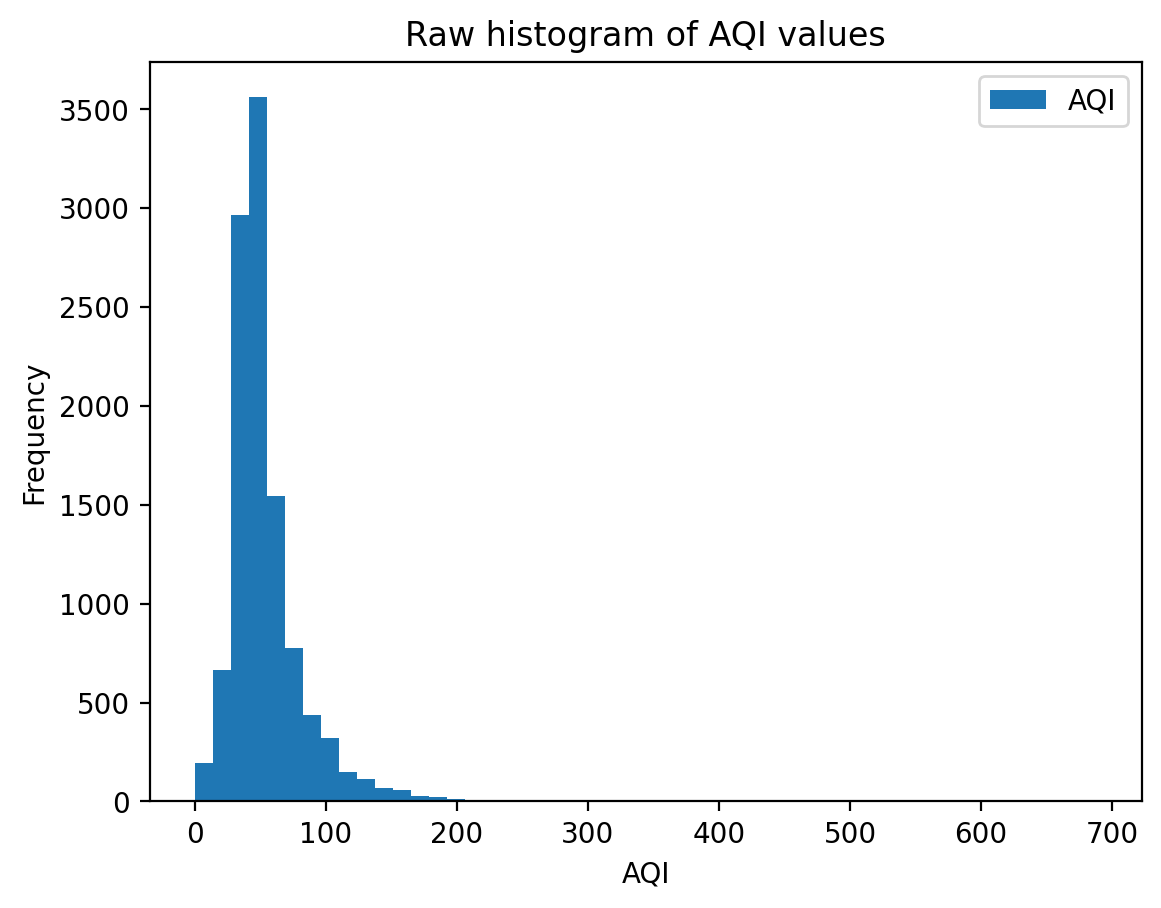

In [153]:
# checking visually the AQI values
ax1 =df.plot(kind='hist', bins=50, xlabel='AQI')
ax1.set_title('Raw histogram of AQI values')

In [154]:
# removing outliers based on AQI

aqi_Q1 = df['AQI'].quantile(0.25)
aqi_Q3 = df['AQI'].quantile(0.75)
aqi_IQR = aqi_Q3 - aqi_Q1

df_no_outliers = df.loc[(df['AQI'] <= aqi_Q3 + (1.5*aqi_IQR)) & 
                        (df['AQI'] >= aqi_Q1 - (1.5*aqi_IQR))]

In [155]:
# for this EDA, we will be concerning ourselves with AQI on a state-by-state basis

df_no_outliers.groupby('state')['AQI'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
AZ,262.0,67.68,15.56,37.0,55.00,67.0,80.00,95.0
CA,612.0,52.36,14.59,27.0,41.00,50.0,60.00,95.0
CO,322.0,61.74,14.25,38.0,49.00,60.0,73.00,93.0
DC,343.0,48.34,14.92,20.0,38.00,46.0,55.00,94.0
FL,717.0,45.60,12.10,23.0,38.00,43.0,52.00,90.0
GA,341.0,52.59,14.91,23.0,42.00,51.0,61.00,93.0
HI,346.0,16.18,6.76,4.0,11.00,15.0,20.00,43.0
IL,318.0,54.06,15.20,24.0,42.00,52.0,63.00,93.0
MA,354.0,44.00,12.22,17.0,35.00,43.0,50.00,90.0


Text(0.5, 1.0, 'Histogram of AQI after outlier removal')

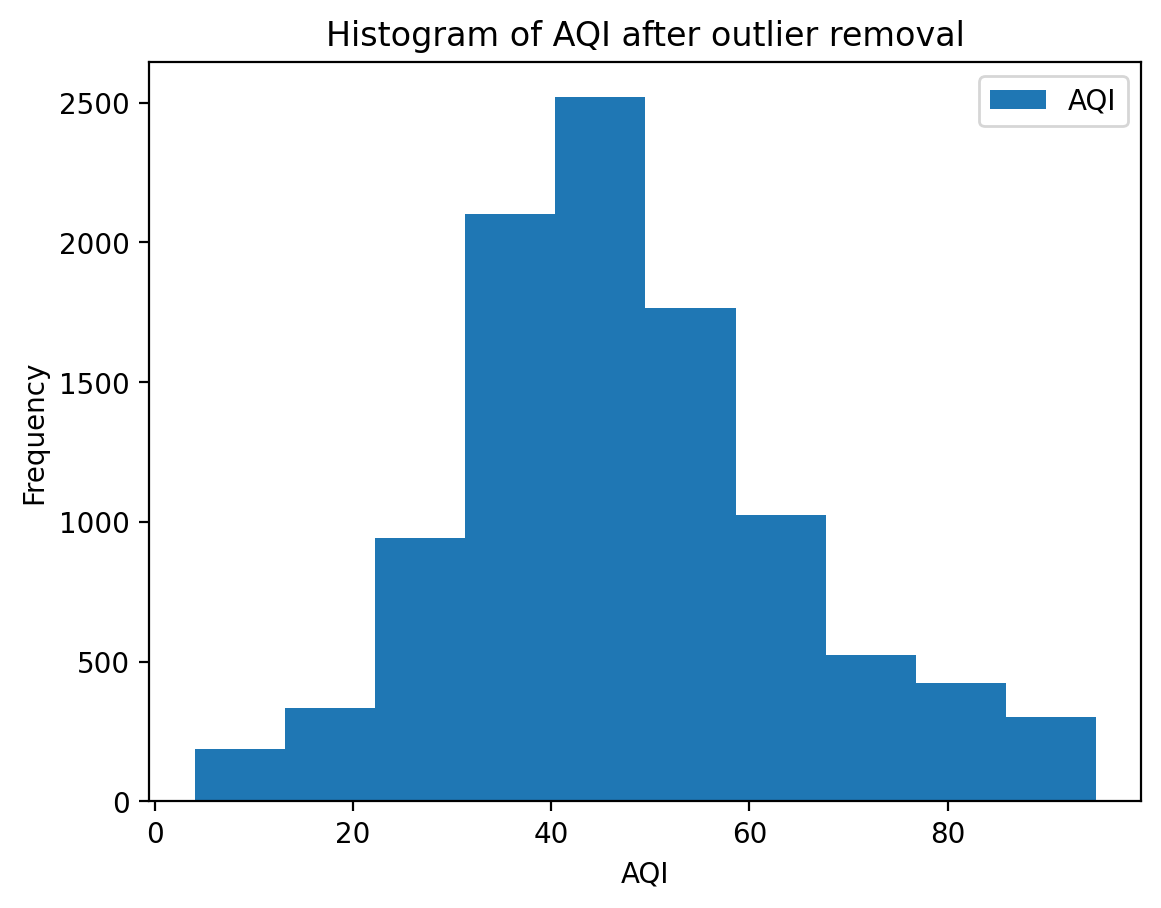

In [156]:
ax2 = df_no_outliers.plot(kind='hist', bins=10, xlabel='AQI')
ax2.set_title('Histogram of AQI after outlier removal')

(0.0, 100.0)

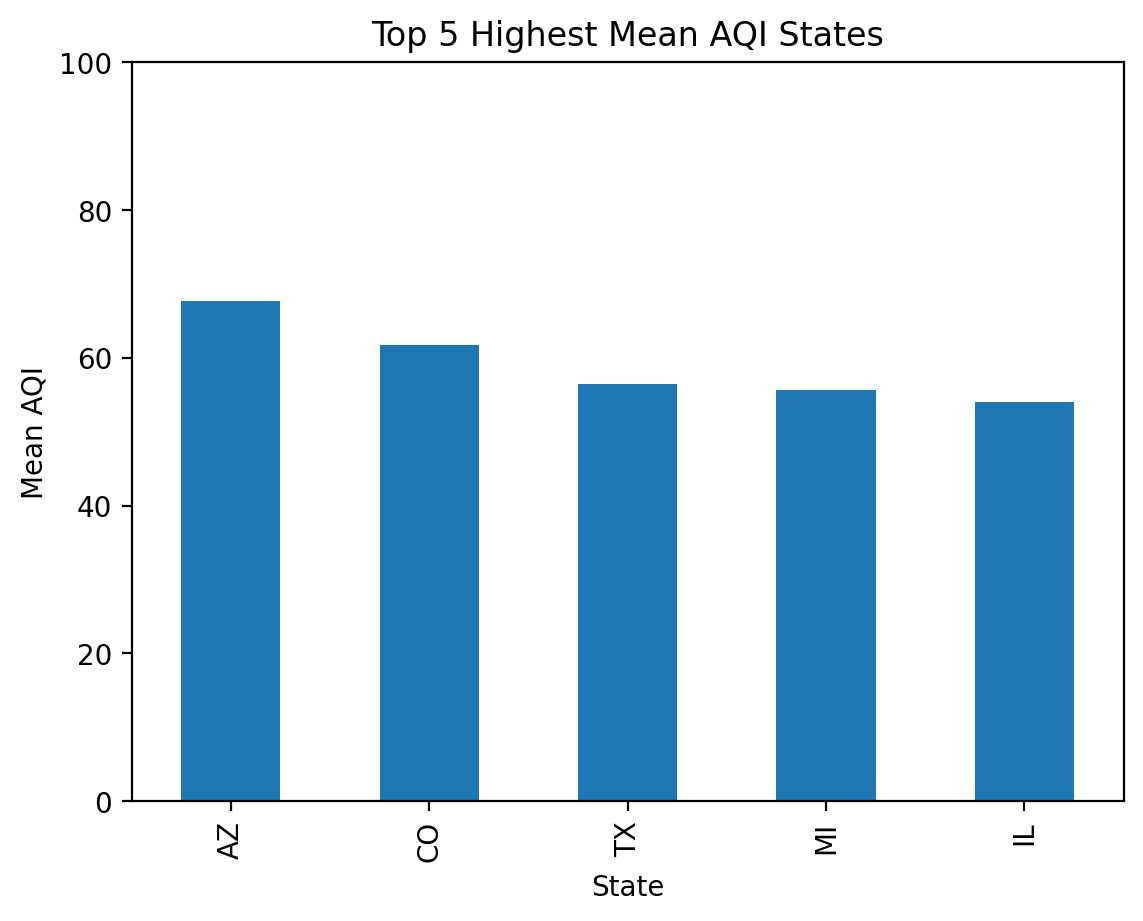

In [157]:
# plotting the means of top 5 states with the highest (worst) mean AQI
# using mean now, as distribution is normal-like after outlier removal
ax3 = df_no_outliers.groupby('state')['AQI']\
                .mean()\
                .sort_values(ascending=False)\
                .head(5)\
                .plot(kind='bar', ylabel='Mean AQI', xlabel='State')
ax3.set_title('Top 5 Highest Mean AQI States')
ax3.set_ylim(0, 100)

(0.0, 100.0)

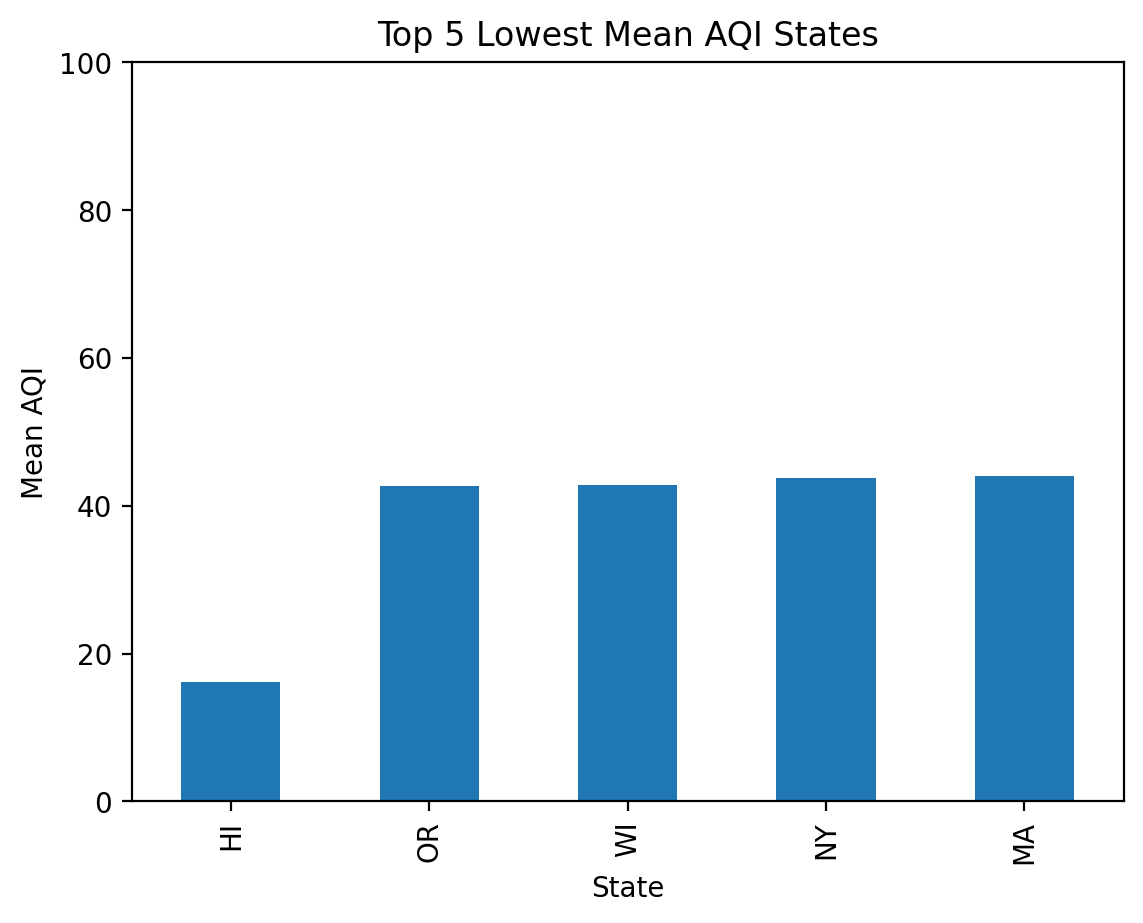

In [159]:
# plotting the means of top 5 states with the lowest (best) mean AQI
ax4 = df_no_outliers.groupby('state')['AQI']\
                .mean()\
                .sort_values()\
                .head(5)\
                .plot(kind='bar', ylabel='Mean AQI', xlabel='State')
ax4.set_title('Top 5 Lowest Mean AQI States')
ax4.set_ylim(0, 100)

Text(0.5, 1.0, 'AQI Trend across all States over the year')

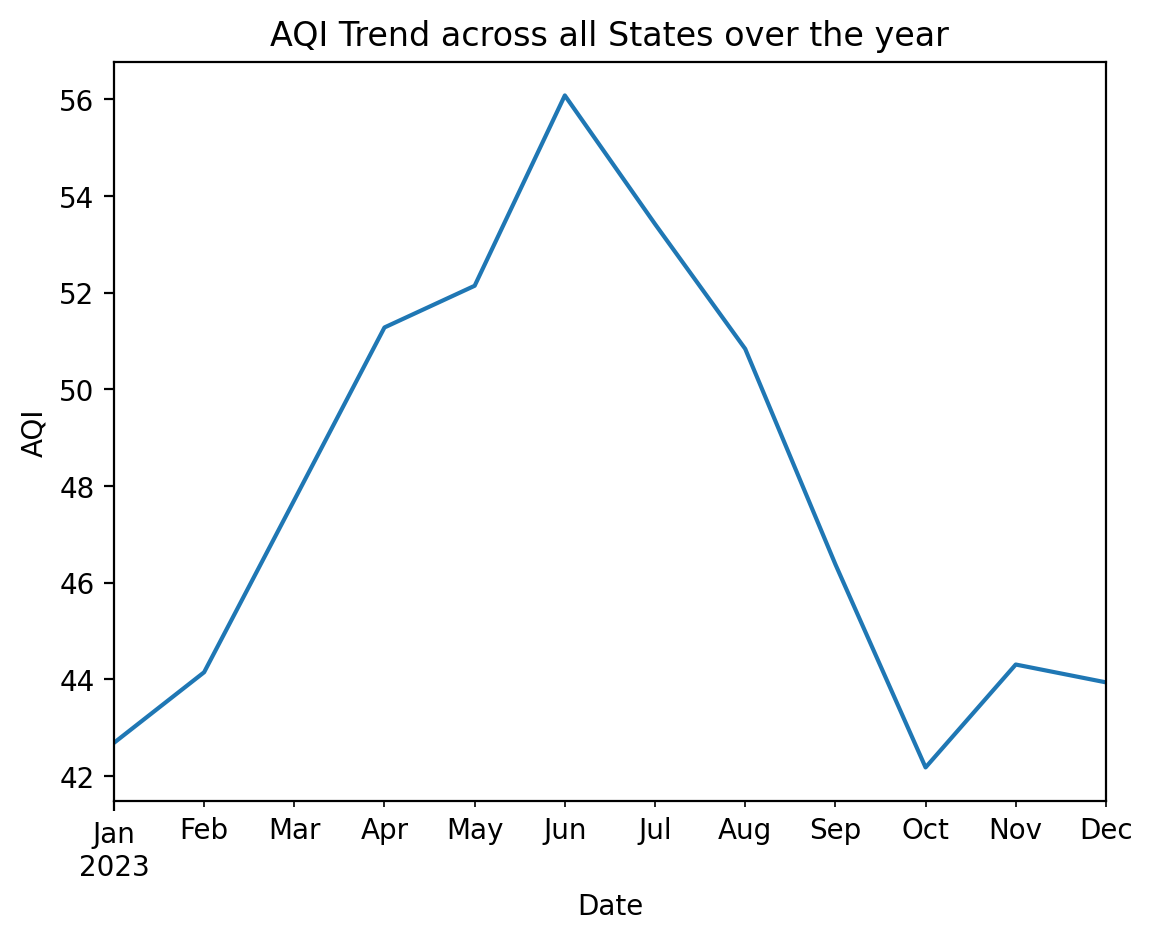

In [143]:
# moving from the geographic analysis of AQI, now checking AQI change with time
# first, on a whole, checking on monthly basis
df_no_outliers.loc[:,'Date'] = pd.to_datetime(df_no_outliers.loc[:,'Date'])
ax5 = df_no_outliers.groupby(pd.Grouper(key='Date', freq='1m'))['AQI']\
                .mean()\
                .plot(ylabel='AQI')
ax5.set_title('AQI Trend across all States over the year')

In [160]:
# this makes sense, as summer months come with increased sunlight, which contribute to higher ozone,
# nitrogen dioxide and other pollutants
df_no_outliers['Main Pollutant'].value_counts()

Main Pollutant
Ozone    4971
PM2.5    4701
PM10      231
NO2       214
CO          4
Name: count, dtype: int64

In [162]:
# and this is backed by ozone and pm2.5 as main pollutants in these states